# Repaso Estadística

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from ipywidgets import interact, IntSlider

In [49]:
%config InlineBackend.figure_format = "retina"

### ¿Qué es el análisis de las series de tiempo?

* Tarea de extraer información estadística con datos que dependen del tiempo

### ¿Qué asumimos al ajustar una regresión lineal a los datos?

1. Normalidad
2. Independencia

### Tres maneras de el parámetro $\boldsymbol\theta$ de una distribución $p(x\vert\boldsymbol\theta)$

$$
    p(\theta\vert\mathcal{D}) \propto p(\theta)p(\mathcal{D}\vert\theta)
$$

1. Máxima Verosimilitud (ML) | $\hat\theta = \arg\max_\theta p(\mathcal{D}\vert\theta)$ 
2. Máximo a-posteriori (MAP)| $\hat\theta = \arg\max_\theta p(\theta)p(\mathcal{D}\vert\theta)$ 
3. Métodos Bayesianos | $\hat\theta = \mathbb{E}[\theta\vert\mathcal {D}]$

### ¿Qué distribución de probabilidad le podríamos asignar al parámetro $\mu$ de una Bernoulli?

$$
    \text{Beta}(\mu\vert\alpha,\beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha - 1} (1 - \mu)^{1 - \beta}
$$

In [50]:
@interact(a=IntSlider(min=1, max=15, value=1),
          b=IntSlider(min=1, max=15, value=1))
def graph_beta(a, b):
    xrange = np.linspace(0, 1, 100)
    b = beta(a=a, b=b)
    plt.plot(xrange, b.pdf(xrange))
    plt.title(f"$p(\mu)$", fontsize=16)

interactive(children=(IntSlider(value=1, description='a', max=15, min=1), IntSlider(value=1, description='b', …

$$
    x\sim\text{Bern}(\mu)
$$

### La versoimilitud de una bernoulli

$$
    p(\mathcal{D}\vert\mu) = \prod_{n=1}^N \mu^{x_n} (1 - \mu)^{(1 - x_n)} = \mu^{\sum_n x_n}(1 - \mu)^{N - \sum_n x_n}
$$

$$
    \mu_{ML} = \bar x
$$

In [8]:
D = np.array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [14]:
# p(D|mu=1), p(D|mu=0.2)
mu = 0.9
N = len(D)

def bern_versosimil(D):
    N = len(D)
    mu_range = np.linspace(0, 1, 200)
    L = mu_range ** D.sum() * (1 - mu_range) ** (N - D.sum())
    plt.plot(mu_range, L)

In [27]:
D = np.array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

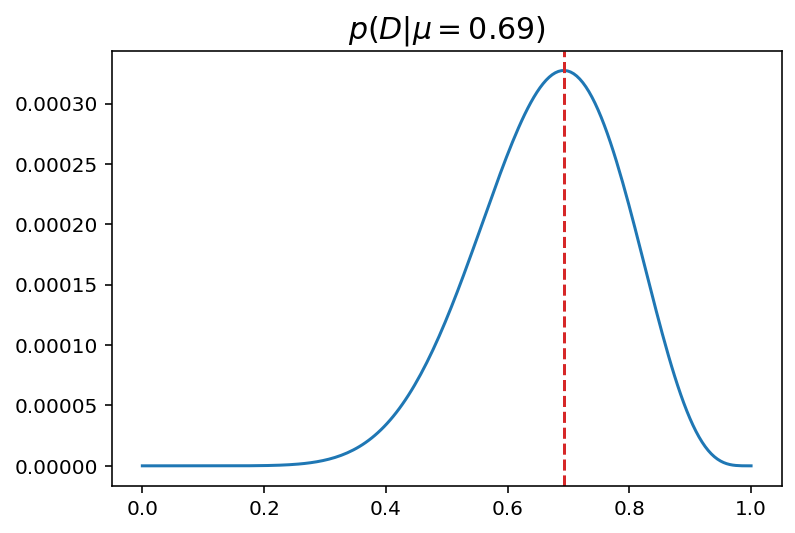

In [26]:
bern_versosimil(D)
plt.axvline(x=D.mean(), c="tab:red", linestyle="--")
plt.title(f"$p(D|\mu={D.mean():0.2f})$", fontsize=15);

$$
    \mu_{MAP} = \frac{\alpha + \sum_n x_n - 1}{\alpha + \beta + N - 2}
$$

In [33]:
D.mean()

0.2727272727272727

In [36]:
D.sum()

3

In [37]:
a

20

In [44]:
# Supongamos que los datos de D se generan lanzando monedas
D = np.array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])
a = 20
b = 20

MAP = (a + D.sum() - 1) / (a + b + N - 2)

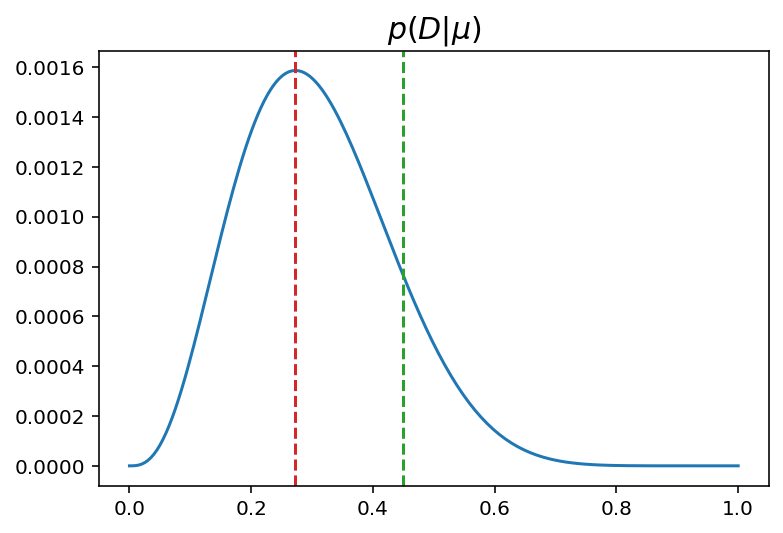

In [45]:
bern_versosimil(D)
plt.axvline(x=D.mean(), c="tab:red", linestyle="--", )
plt.axvline(x=MAP, c="tab:green", linestyle="--")
plt.title(f"$p(D|\mu)$", fontsize=15);

$$
    \mathbb{E}[\mu] = \frac{\alpha}{\alpha + \beta}
$$

Para la distribución a-posteriori

$$
    \hat\alpha = \alpha + \sum_n x_n 
$$

$$
    \hat\beta = \beta + N - \sum_n x_n
$$

In [51]:
alpha, beta = 1, 1
# x = 1 (caras)
N = 1
alpha = alpha + 1
beta = beta + 1 - 1

In [58]:
from scipy.stats import beta
from scipy.stats import bernoulli

In [61]:
D = np.array([0, 1, 1, 1, 0, 0, 1, 1])
D = bernoulli(0.3).rvs(500)
a, b = 1, 1
@interact(N=IntSlider(min=0, max=len(D), value=0))
def plot_posterior(N):
    Dv = D[:N]
    a_hat, b_hat = a + Dv.sum(), b + len(Dv) - Dv.sum()
    
    xrange = np.linspace(0, 1, 100)
    p_prior = beta(a=a, b=b)
    p_posterior = beta(a=a_hat, b=b_hat)

    mu_map = (a + Dv.sum() - 1) / (a + b + len(Dv) - 2)

    plt.plot(xrange, p_prior.pdf(xrange), label="$p(\mu)$")
    plt.plot(xrange, p_posterior.pdf(xrange), label="$p(\mu|\mathcal{D})$")
    plt.axvline(x=mu_map, c="tab:red", linestyle="--")
    plt.title(rf"$E={p_posterior.mean():0.2f} || (\alpha={a_hat}, \beta={b_hat})$", fontsize=15)
    plt.legend(fontsize=13);


interactive(children=(IntSlider(value=0, description='N', max=500), Output()), _dom_classes=('widget-interact'…